# Imagens .fits

No último notebook, salvamos os dados da imagem que criamos em formato .fits. Neste notebook, iremos ver um pouco melhor sobre o que significa esse formato.

FITS significa "Flexible Image Transport System". Este é um formato utilizado para armazenar, transmitir e manipular imagens científicas (ou algo similiar), comumente utilizado em Astronomia. Ele inclui informações internas que descrevem parâmetros de calibração fotométrica e espaciais, junto aos dados brutos origem da imagem.

#A Nebulosa Pilares da Criação

Vamos recordar um pouquinho do que foi aprendido até aqui plotando a Nebulosa da Águia, também chamada de "Pilares da Criação".

A Nebulosa da Águia foi tirada pelo telescópio MPG/ESO de 2,2 metros, no Observatório de La Silla. No centro é possível ver os “Pilares da Criação”. Esta imagem mostra também um enorme número de estrelas, à frente e atrás da Nebulosa da Águia. O aglomerado de estrelas brilhantes, em cima à direita, é NGC 6611, que abriga as estrelas quentes de grande massa que iluminam os pilares.

<img src="eso0926a.jpg" width=50% >

_Crédito: ESO. Disponível em: < https://www.eso.org/public/brazil/images/eso0926a/ >._

Para obter uma imagem astronômica, é necessário observar uma mesma região com "olhos" diferentes. Para relembrar a plotagem aprendida até então, vamos graficar a região dos pilares em três comprimentos de ondas diferentes: 656nm, 673nm, e 502 nm.

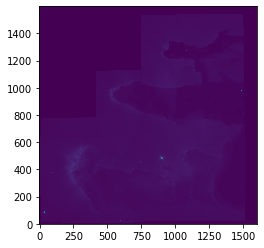

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [20]:
from astropy.nddata import CCDData
import numpy as np

#656 nm

ccd2 = CCDData.read('656nmos.fits', unit='adu')
import matplotlib.pyplot as plt
plt.imshow(ccd2, origin='lower')
plt.show()

Changed DATE-OBS from ' 1/04/95          ' to '1995-04-01''. [astropy.wcs.wcs]


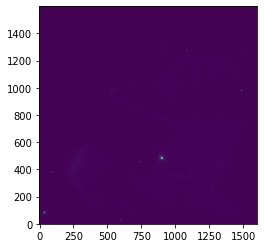

In [2]:
#673 nm

ccd2 = CCDData.read('673nmos.fits', unit='adu')
import matplotlib.pyplot as plt
plt.imshow(ccd2, origin='lower')
plt.show()

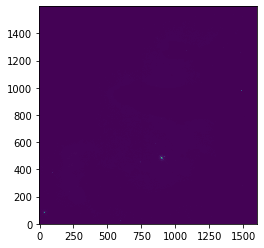

In [21]:
#502 nm

ccd2 = CCDData.read('502nmos.fits', unit='adu')
import matplotlib.pyplot as plt
plt.imshow(ccd2, origin='lower')
plt.show()

# Visualização e manipulação de imagens FITS

Vamos aprofundar um pouco mais nessa leitura de imagens usando o tutorial fornecido pela própria Astropy (https://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

### Analisando a Nebulosa Cabeça de Cavalo

Esta é uma imagem composta por três exposições feitas na região óptica do espectro electromagnético. Como diz a ESO: "As imagens foram obtidas na banda B (600 segundos de exposição; comprimento de onda 429 nanometros; FWHM 88 nanometros; mostrada a azul), banda V (300 seg.; 554 nm; 112 nm; verde) e banda R (120 seg.; 655 nm, 165 nm; vermelho). O tamanho original do pixel é de 0,2 segundos de arco. A fotografia mostra o campo total obtido para as três cores; cerca de 6,5 X 6,7 segundos de arco ao quadrado".

<img src="eso0202a.jpg" width=50% >

_Crédito: ESO. Disponível em: < https://www.eso.org/public/brazil/images/eso0202a/ >_

Essa nebulosa está na constelação de Orion, abaixo do cinturão do caçador. Está a aproximadamente 1500 anos-luz da Terra.

In [3]:
from astropy.utils.data import download_file

#Fazendo download do arquivo .FITS desta nebulosa:
arquivo = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

Para abrir o arquivo e poder trabalhar com ele, usaremos o astropy.io que importamos como "fits" anteriormente:

In [4]:
arq = fits.open(arquivo)
arq.info()

Filename: /home/lucas/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Repare que "arq" possui várias informações. O que queremos (a imagem) está em PRIMARY. Então:

In [5]:
imagem = arq[0].data

In [6]:
#Dando uma olhada no tipo e na dimensão da imagem:
print(type(imagem))
print(imagem.shape)

<class 'numpy.ndarray'>
(893, 891)


Vamos fechar o arquivo agora, porque já temos o que precisamos:

In [7]:
arq.close()

 Vamos então, finalmente, ver essa matriz armazenada em "imagem":

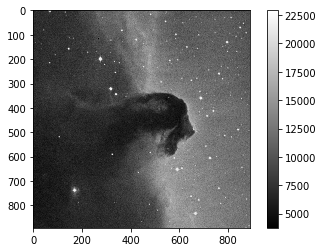

In [8]:
plt.imshow(imagem, cmap='gray')
plt.colorbar()

In [9]:
plt.imshow?

Vamos agora obter o menor, o maior e a média dos valores da nossa imagem.

In [44]:
print('Mín:', np.min(imagem))
print('Máx:', np.max(imagem))
print('Média:', np.mean(imagem))

Mín: 3759
Máx: 22918
Média: 9831.481676287574


# Histograma

Com o ndarray.flatten () vamos transformar a nossa matriz 2D em unidimensional e depois usar o matplotlib.pyplot.hist ().

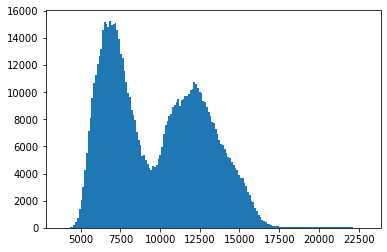

In [14]:
histograma = plt.hist(imagem.flatten(), bins='auto')

# Trabalhando com escala logarítmica

Uma típica situação onde a escala logarítmica é benéfica é quando a amplitude dos valores em um gráfico é muito grande.
A nossa amplitude atualmente é:

In [43]:
print('Amplitude:', np.max(imagem) - np.min(imagem))

Amplitude: 19159


In [25]:
from matplotlib.colors import LogNorm

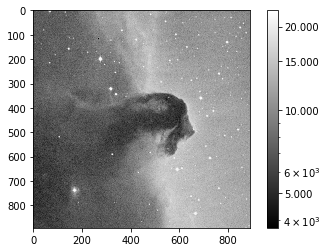

In [42]:
plt.imshow(imagem, cmap='gray', norm=LogNorm())

#Definindo números que apareceram na barra logarítimica
cbar = plt.colorbar(ticks=[5e3, 1e4 , 1.5e4 ,2e4])

#"Legenda" de cada número que aparece ali em cima. Tente mudar 5.000 por "cinco mil", por exemplo.
cbar.ax.set_yticklabels(['5.000', '10.000','15.000','20.000'])
plt.show()

Para você observar a mudança entre as duas imagens (há um arquivo nesta pasta que permite obter estas imagens):
<img src="Escala_aritmetica.png" width=50% >
<img src="Escala_logaritmica.png" width=50% >

Fonte do código:

Lia Corrales, Kris Stern, Stephanie T. Douglas, Kelle Cruz. "Viewing and manipulating FITS images". Disponível em: < https://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials >. Acesso em: 6 de dezembro de 2020.

Fonte do texto:

Projecto Exoplanetas. "Formato de Imagens FITS". Disponível em: < https://sites.google.com/site/exoplanetasesdm/formato-de-imagens-fits >. Acesso em: 6 de dezembro de 2020.

ESO. "A Nebulosa da Cabeça de Cavalo". Disponível em: < https://www.eso.org/public/brazil/images/eso0202a/ >. Acesso em: 6 de dezembro de 2020.

Fonte dos arquivos lidos:

NASA/ESA Hubble Space Telescope. "Datasets for education and for fun, The Eagle Nebula - the 'Pillars of Creation'". Disponível em: < https://www.spacetelescope.org/projects/fits_liberator/eagledata/ >. Acesso em 6 de dezembro de 2020.
